In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Conectarse con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Carga de datos
data = pd.read_csv('/content/drive/MyDrive/Aprendizaje No Supervisado/datos_proyecto.csv', sep=';')

In [ ]:
# Exploración inicial
data.head()

,Mes,Cliente,CategoriaMarca,SKU,VtaTon,VtaValor,Departamento,Poblacion,TipologiaCliente,DiaAtencion,CentroDespacho,OficinVentas
0,202401,3001295,CM5,Q1060,0.00720,62657.16,BOGOTÁ,BOGOTÁ D.C.,T16,MI,6038,6030
1,202401,3001295,CM27,M1083,0.00960,55371.36,BOGOTÁ,BOGOTÁ D.C.,T16,MI,6038,6030
2,202401,3001302,CM6,Q393,0.00132,13114.32,BOGOTÁ,BOGOTÁ D.C.,T16,MI,6038,6030
3,202401,3001306,CM6,Q916,0.01920,194285.76,BOGOTÁ,BOGOTÁ D.C.,T16,LU,6038,6030
4,202401,3001306,CM8,Q1280,0.00050,13035.75,BOGOTÁ,BOGOTÁ D.C.,T16,LU,6038,6030


In [ ]:
# Información básica del dataset
print("\nInformación del dataset:")
print(data.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234289 entries, 0 to 1234288
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Mes               1234289 non-null  int64  
 1   Cliente           1234289 non-null  int64  
 2   CategoriaMarca    1234289 non-null  object 
 3   SKU               1234289 non-null  object 
 4   VtaTon            1234289 non-null  float64
 5   VtaValor          1234289 non-null  float64
 6   Departamento      1234289 non-null  object 
 7   Poblacion         1234289 non-null  object 
 8   TipologiaCliente  1234289 non-null  object 
 9   DiaAtencion       1234289 non-null  object 
 10  CentroDespacho    1234289 non-null  int64  
 11  OficinVentas      1234289 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 113.0+ MB
None


In [ ]:
# Resumen estadístico de las variables numéricas
print("\nResumen estadístico de las variables numéricas:")
print(data.describe())


Resumen estadístico de las variables numéricas:
                Mes       Cliente        VtaTon      VtaValor  CentroDespacho  \
count  1.234289e+06  1.234289e+06  1.234289e+06  1.234289e+06    1.234289e+06   
mean   2.024041e+05  3.028022e+06  3.069266e-02  1.787663e+05    6.035504e+03   
std    1.990772e+00  1.538783e+04  3.111323e-01  1.302653e+06    3.005983e+00   
min    2.024010e+05  3.001295e+06 -2.000000e+00 -8.957606e+06    6.001000e+03   
25%    2.024020e+05  3.013169e+06  1.380000e-03  1.735713e+04    6.033000e+03   
50%    2.024040e+05  3.030708e+06  4.500000e-03  4.330296e+04    6.038000e+03   
75%    2.024060e+05  3.043733e+06  1.600000e-02  1.173809e+05    6.038000e+03   
max    2.024070e+05  3.072785e+06  8.609400e+01  2.623801e+08    6.039000e+03   

       OficinVentas  
count  1.234289e+06  
mean   6.031131e+03  
std    1.433605e+00  
min    6.030000e+03  
25%    6.030000e+03  
50%    6.030000e+03  
75%    6.032000e+03  
max    6.034000e+03  


In [ ]:
# Comprobar valores faltantes en cada columna
print("\nValores faltantes por columna:")
print(data.isnull().sum())


Valores faltantes por columna:
Mes                 0
Cliente             0
CategoriaMarca      0
SKU                 0
VtaTon              0
VtaValor            0
Departamento        0
Poblacion           0
TipologiaCliente    0
DiaAtencion         0
CentroDespacho      0
OficinVentas        0
dtype: int64


In [ ]:
# Comprobar los datos únicos en cada columna categórica
print("\nValores únicos por columna categórica:")
for column in data.select_dtypes(include='object').columns:
    print(f"{column}: {data[column].nunique()}")


Valores únicos por columna categórica:
CategoriaMarca: 21
SKU: 224
Departamento: 27
Poblacion: 484
TipologiaCliente: 8
DiaAtencion: 6



Distribución de las variables numéricas:


array([[<Axes: title={'center': 'Mes'}>,
        <Axes: title={'center': 'Cliente'}>],
       [<Axes: title={'center': 'VtaTon'}>,
        <Axes: title={'center': 'VtaValor'}>],
       [<Axes: title={'center': 'CentroDespacho'}>,
        <Axes: title={'center': 'OficinVentas'}>]], dtype=object)

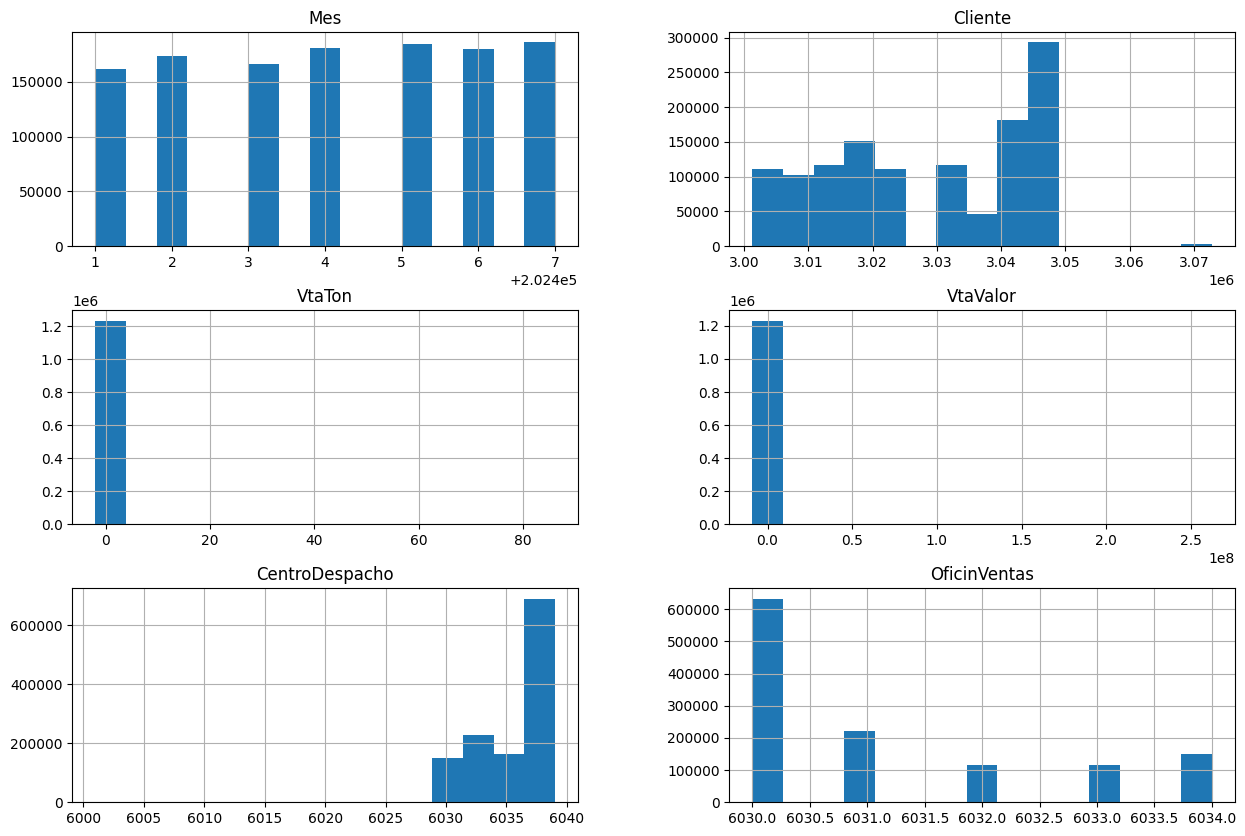

In [ ]:
# Distribución de las variables numéricas
print("\nDistribución de las variables numéricas:")
data.hist(bins=15, figsize=(15, 10))

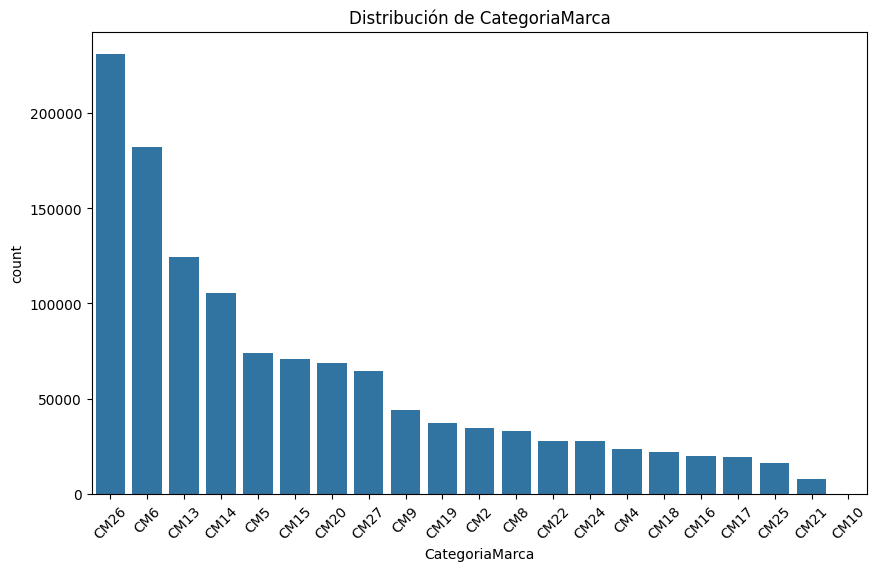

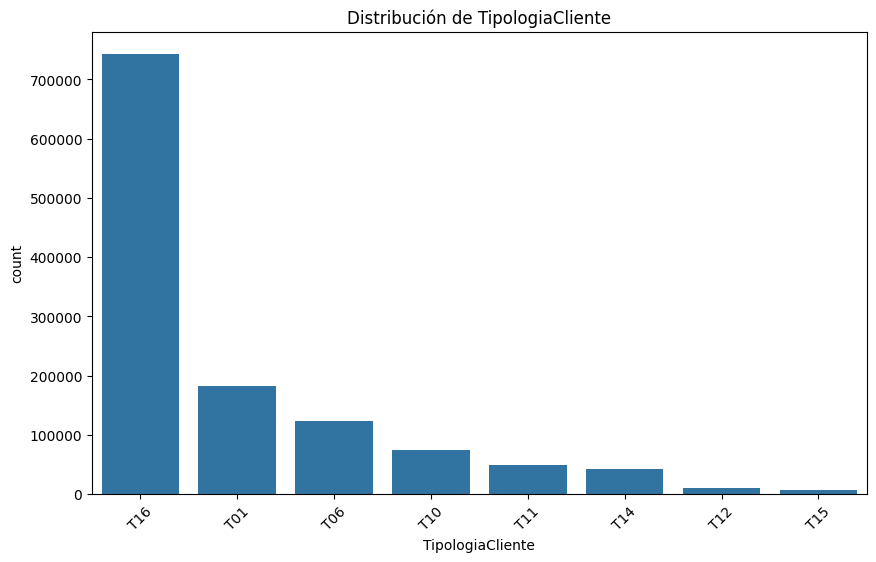

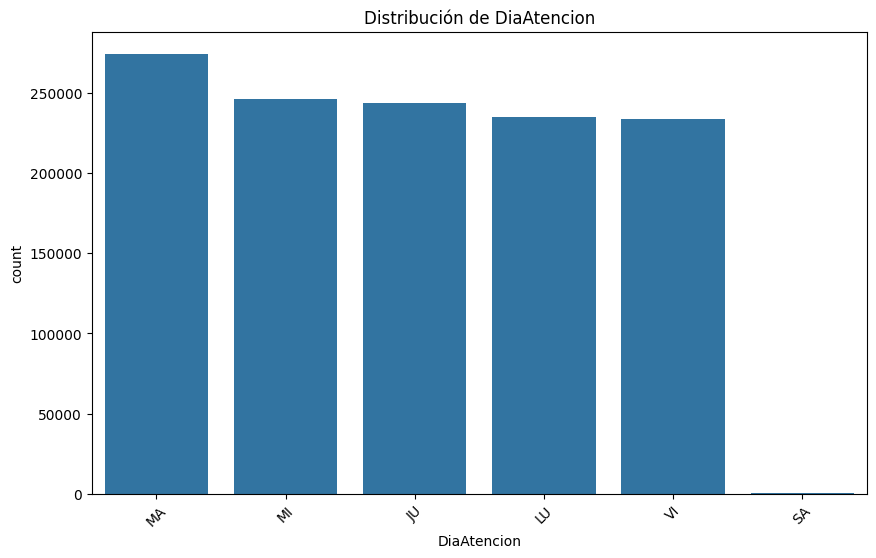

In [ ]:
# Lista de columnas categóricas
categorical_columns_to_plot = ['CategoriaMarca', 'TipologiaCliente', 'DiaAtencion']

# Gráfico de barras para cada variable categórica
for column in categorical_columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column, order=data[column].value_counts().index)
    plt.title(f'Distribución de {column}')
    plt.xticks(rotation=45)
    plt.show()


Correlación entre variables numéricas:


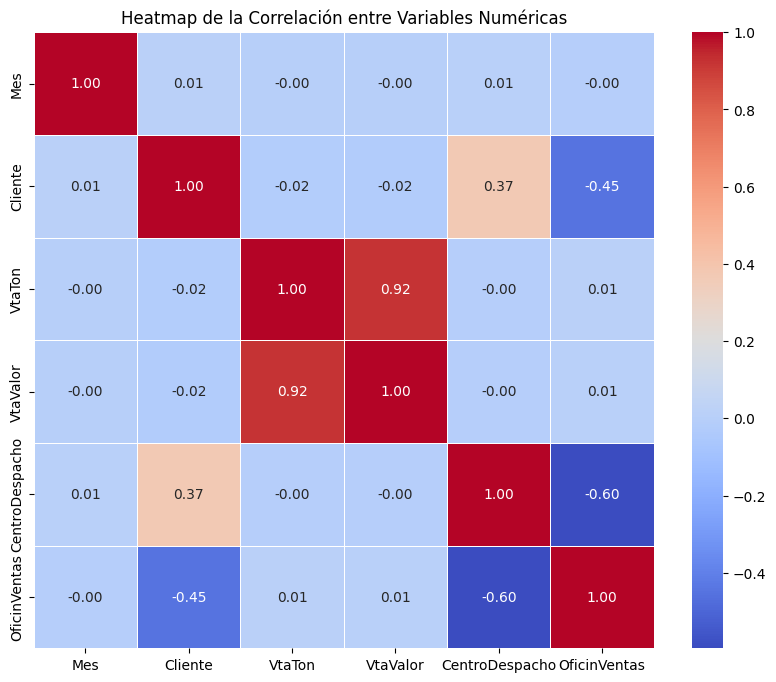

In [ ]:
# Calcular la correlación solo entre columnas numéricas
print("\nCorrelación entre variables numéricas:")
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap de la Correlación entre Variables Numéricas')
plt.show()

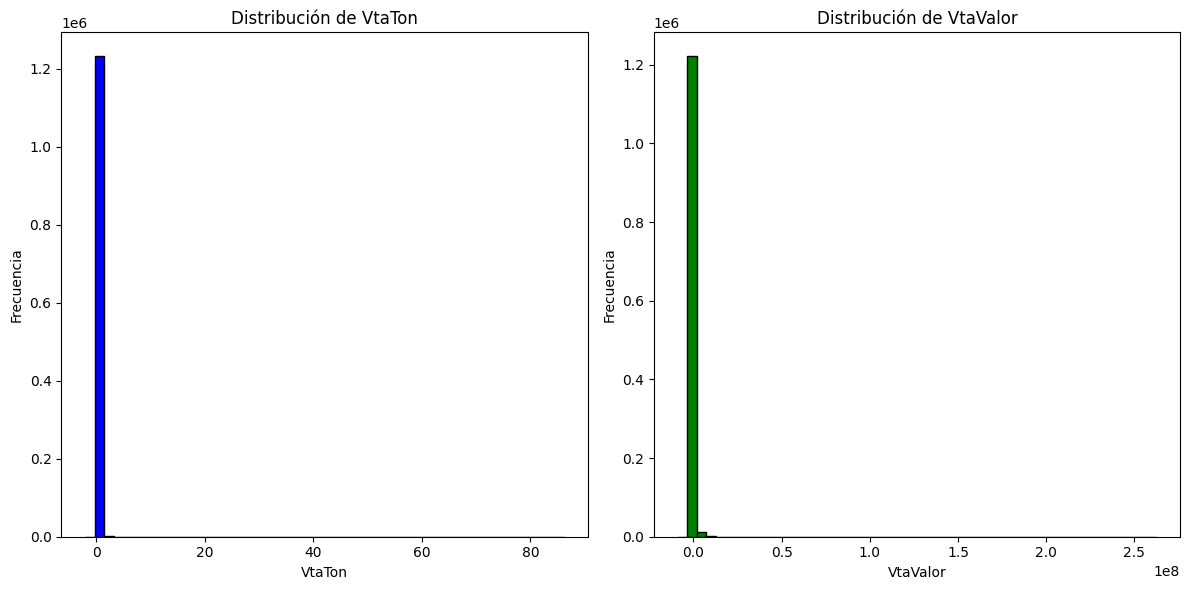

In [8]:
# Plotting the distribution of VtaTon and VtaValor
plt.figure(figsize=(12, 6))

# Distribution for VtaTon
plt.subplot(1, 2, 1)
plt.hist(data['VtaTon'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de VtaTon')
plt.xlabel('VtaTon')
plt.ylabel('Frecuencia')

# Distribution for VtaValor
plt.subplot(1, 2, 2)
plt.hist(data['VtaValor'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de VtaValor')
plt.xlabel('VtaValor')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


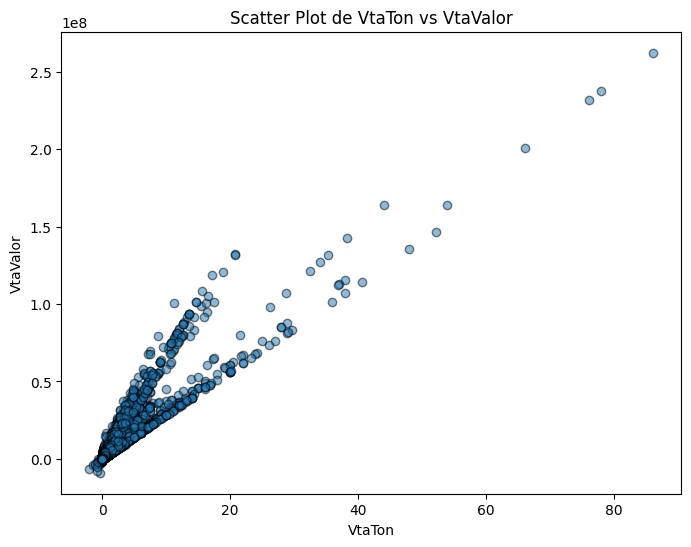

In [9]:
# Crear un scatter plot de VtaTon vs VtaValor
plt.figure(figsize=(8, 6))
plt.scatter(data['VtaTon'], data['VtaValor'], alpha=0.5, edgecolor='k')
plt.title('Scatter Plot de VtaTon vs VtaValor')
plt.xlabel('VtaTon')
plt.ylabel('VtaValor')
plt.show()